<a href="https://colab.research.google.com/github/Tri-M/sem9/blob/main/CV_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

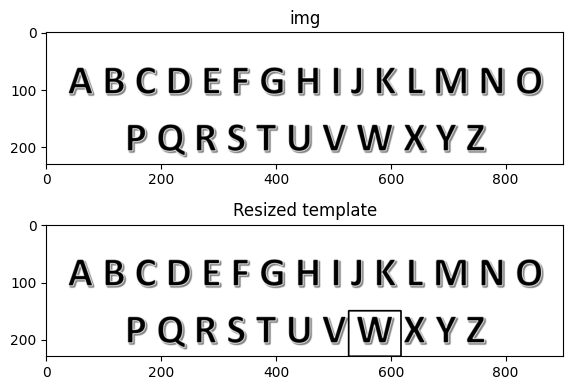

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
!pip install sounddevice
# import sounddevice as sd
import scipy.io as spio
import scipy.signal as spsg
from skimage.filters import laplace, sobel, prewitt, gaussian
from skimage import segmentation
from skimage.util import random_noise
from skimage.feature import canny

img = cv.imread('/content/A-Z.png', cv.IMREAD_GRAYSCALE)
template = cv.imread('/content/W.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 4))
plt.subplot(211), plt.imshow(img, cmap="gray"), plt.title("img")
plt.subplot(212), plt.imshow(template, cmap="gray"), plt.title("template")
plt.tight_layout()

# plt.imshow(img[150:, 530:620]) ---- W sliced from the A-Z image to resize the template
# from the we can get the shape the template should be in
h, w = img[150:, 530:621].shape
template = cv.resize(template, (w, h))
plt.imshow(template, cmap="gray"), plt.title("Resized template")

img_copy = img.copy()
res = cv.matchTemplate(img, template, cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv.rectangle(img, top_left, bottom_right, 0, 2)
plt.imshow(img, cmap="gray")


2. Perform template matching of “voice signal”. Perform the following step by step
Step 1: Record your voice with sampling rate of 8000 Hz for a duration of one second. The word to be uttered is “Hello”. This has to be done uniformly so that the length of the signal remains the same for everyone.
Step 2: Perform correlation of “Hello” with respect to other “Hello” signal and find the best match.


<ipython-input-26-141f086c3b0f>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  recorded_rate, recorded_signal = wavfile.read('/content/hello.wav')


Length of lag: 146829
Length of correlation: 146829


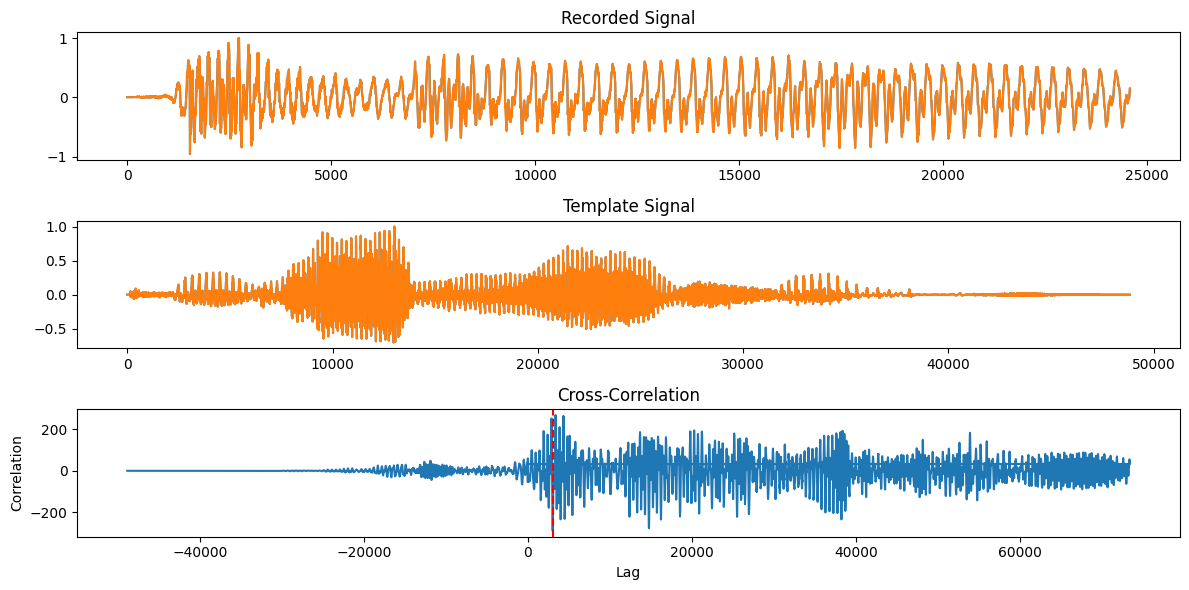

Best match at lag: 3042


In [26]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import correlate
import matplotlib.pyplot as plt

# Load the recorded audio and template audio
recorded_rate, recorded_signal = wavfile.read('/content/hello.wav')
template_rate, template_signal = wavfile.read('/content/congo.wav')

# Ensure both signals have the same sampling rate
assert recorded_rate == template_rate, "Sampling rates do not match"

# Normalize signals
recorded_signal = recorded_signal / np.max(np.abs(recorded_signal))
template_signal = template_signal / np.max(np.abs(template_signal))

# Perform cross-correlation
correlation = correlate(recorded_signal.flatten(), template_signal.flatten(), mode='full')

# Compute lag array based on the length of correlation
lag = np.arange(-len(template_signal) + 1, len(recorded_signal))

# Adjust lag to match the length of correlation
# Correlation length is len(recorded_signal) + len(template_signal) - 1
expected_lag_length = len(correlation)
lag = np.arange(-len(template_signal) + 1, len(recorded_signal) + len(template_signal))

# Trim or pad lag to match correlation length
if len(lag) > expected_lag_length:
    lag = lag[:expected_lag_length]
else:
    lag = np.pad(lag, (0, expected_lag_length - len(lag)), mode='constant')

# Check lengths
print(f'Length of lag: {len(lag)}')
print(f'Length of correlation: {len(correlation)}')

# Ensure lengths match
assert len(lag) == len(correlation), "Lag and correlation lengths do not match."

# Find the best match
best_match_index = np.argmax(np.abs(correlation))
best_lag = lag[best_match_index]

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(recorded_signal)
plt.title('Recorded Signal')

plt.subplot(3, 1, 2)
plt.plot(template_signal)
plt.title('Template Signal')

plt.subplot(3, 1, 3)
plt.plot(lag, correlation)
plt.title('Cross-Correlation')
plt.axvline(x=best_lag, color='r', linestyle='--')
plt.xlabel('Lag')
plt.ylabel('Correlation')

plt.tight_layout()
plt.show()

print(f'Best match at lag: {best_lag}')


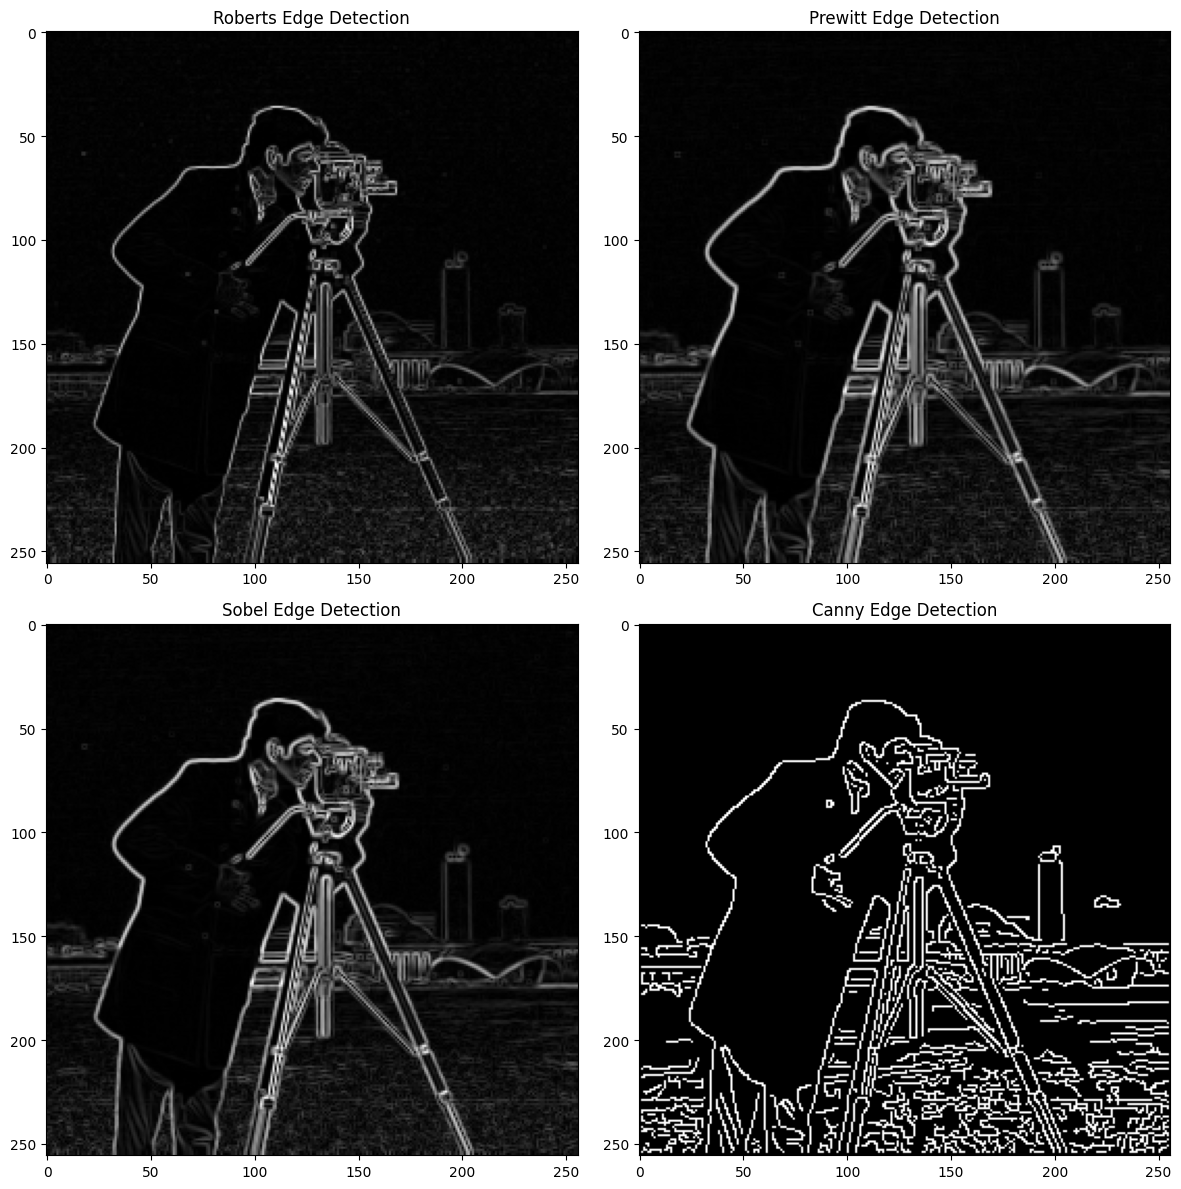

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import roberts, prewitt, sobel
from skimage.feature import canny

# Load the image
image_path = '/content/cameraman.png'  # Replace with your image path
image = io.imread(image_path)

# Check if the image is already grayscale
if len(image.shape) == 2:  # Grayscale image
    gray_image = image
else:  # RGB image
    gray_image = color.rgb2gray(image)

# Apply edge detection operators
edges_roberts = roberts(gray_image)
edges_prewitt = prewitt(gray_image)
edges_sobel = sobel(gray_image)
edges_canny = canny(gray_image)

# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(edges_roberts, cmap='gray')
plt.title('Roberts Edge Detection')

plt.subplot(2, 2, 2)
plt.imshow(edges_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.subplot(2, 2, 3)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edge Detection')

plt.subplot(2, 2, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()


Write a python code to prove that “Laplacian” operator is an “isotropic” operator.


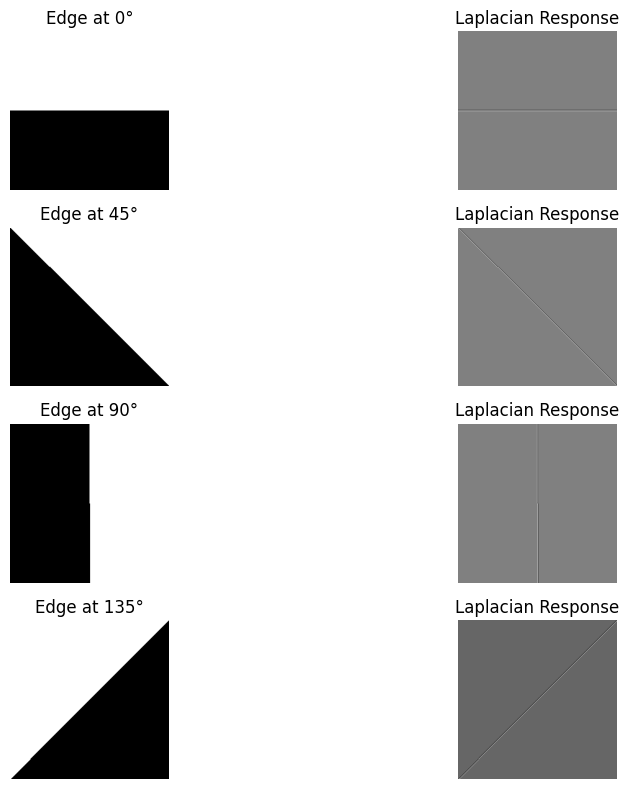

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_edge_image(size, angle):
    """Create an image with an edge oriented at a specific angle."""
    image = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    for y in range(size):
        for x in range(size):
            if y < center + np.tan(np.deg2rad(angle)) * (x - center):
                image[y, x] = 255
    return image

def apply_laplacian(image):
    """Apply Laplacian operator to an image."""
    image = np.uint8(image)  # Convert image to 8-bit format
    laplacian = cv2.Laplacian(image, cv2.CV_64F)  # Apply Laplacian operator
    return laplacian

# Parameters
size = 256
angles = [0, 45, 90, 135]  # Different edge orientations

# Create figures
plt.figure(figsize=(12, 8))

for i, angle in enumerate(angles):
    # Create edge image
    edge_image = create_edge_image(size, angle)

    # Apply Laplacian operator
    laplacian_image = apply_laplacian(edge_image)

    # Plot original edge image
    plt.subplot(len(angles), 2, 2*i + 1)
    plt.imshow(edge_image, cmap='gray')
    plt.title(f'Edge at {angle}°')
    plt.axis('off')

    # Plot Laplacian of the image
    plt.subplot(len(angles), 2, 2*i + 2)
    plt.imshow(laplacian_image, cmap='gray')
    plt.title(f'Laplacian Response')
    plt.axis('off')

plt.tight_layout()
plt.show()
